# Чтение и подготовка данных

In [88]:
import math
import random

import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df1 = pd.read_csv('Data.csv', sep=',')

In [45]:
df1 = df1[:600]

In [46]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              600 non-null    int64
 1   Workclass        600 non-null    int8 
 2   Fnlwgt           600 non-null    int64
 3   Education        600 non-null    int8 
 4   Education-num    600 non-null    int64
 5   Marital-status   600 non-null    int8 
 6   Occupation       600 non-null    int8 
 7   Relationship     600 non-null    int8 
 8   Race             600 non-null    int8 
 9   Sex              600 non-null    int8 
 10  Capital-gain     600 non-null    int64
 11  Capital-loss     600 non-null    int64
 12  Hours-per-week   600 non-null    int64
 13  Native-Country   600 non-null    int8 
 14  Income-per-year  600 non-null    int8 
dtypes: int64(6), int8(9)
memory usage: 33.5 KB


In [47]:
df1.describe()

,Age,Workclass,Fnlwgt,Education,Education-num,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-Country,Income-per-year
count,600.000000,600.000000,6.000000e+02,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,38.016667,3.781667,1.926703e+05,10.311667,10.073333,2.585000,6.768333,1.525000,3.625000,0.665000,562.980000,101.825000,39.801667,36.738333,0.223333
std,13.505816,1.498134,1.124690e+05,3.874646,2.586976,1.485413,4.306457,1.662523,0.886388,0.472384,2658.704404,427.045514,11.740474,7.788729,0.416827
min,17.000000,0.000000,2.117400e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,4.000000,1.144500e+05,9.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,39.000000,0.000000
50%,36.000000,4.000000,1.839230e+05,11.000000,10.000000,2.000000,7.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,39.000000,0.000000
75%,46.000000,4.000000,2.455462e+05,12.000000,12.000000,4.000000,10.000000,3.000000,4.000000,1.000000,0.000000,0.000000,42.250000,39.000000,0.000000
max,90.000000,7.000000,1.033222e+06,15.000000,16.000000,6.000000,14.000000,5.000000,4.000000,1.000000,34095.000000,2415.000000,98.000000,39.000000,1.000000


## Change type Object to Category

In [48]:
df1['Workclass'].value_counts()

4    415
6     45
2     42
0     41
7     21
5     18
1     18
Name: Workclass, dtype: int64

In [49]:
df1['Workclass'] = df1['Workclass'].astype('category').cat.codes

In [50]:
df1['Education'].value_counts()

11    186
15    141
9      95
12     33
1      29
7      27
8      26
0      11
5      10
6       9
10      8
14      7
4       7
3       6
2       4
13      1
Name: Education, dtype: int64

In [51]:
df1['Education'] = df1['Education'].astype('category').cat.codes

In [52]:
df1['Marital-status'].value_counts()

2    272
4    203
0     84
5     16
6     14
3     10
1      1
Name: Marital-status, dtype: int64

In [53]:
df1['Marital-status'] = df1['Marital-status'].astype('category').cat.codes

In [54]:
df1['Occupation'].value_counts()

3     78
10    74
12    68
4     68
8     65
1     56
0     41
7     35
14    32
6     28
13    26
5     14
11    13
9      1
2      1
Name: Occupation, dtype: int64

In [55]:
df1['Occupation'] = df1['Occupation'].astype('category').cat.codes

In [56]:
df1['Relationship'].value_counts()

0    226
1    170
3     83
4     64
5     42
2     15
Name: Relationship, dtype: int64

In [57]:
df1['Relationship'] = df1['Relationship'].astype('category').cat.codes

In [58]:
df1['Race'].value_counts()

4    501
2     69
1     18
0      7
3      5
Name: Race, dtype: int64

In [59]:
df1['Race'] = df1['Race'].astype('category').cat.codes

In [60]:
df1['Sex'].value_counts()

1    399
0    201
Name: Sex, dtype: int64

In [61]:
df1['Sex'] = df1['Sex'].astype('category').cat.codes

In [62]:
df1['Native-Country'].value_counts()

39    538
26     14
0      11
33      4
2       3
20      3
9       2
32      2
31      2
30      2
5       2
11      2
35      1
1       1
4       1
6       1
7       1
8       1
14      1
10      1
16      1
37      1
22      1
23      1
25      1
36      1
19      1
Name: Native-Country, dtype: int64

In [63]:
df1['Native-Country'] = df1['Native-Country'].astype('category').cat.codes

In [64]:
df1['Income-per-year'].value_counts()

0    466
1    134
Name: Income-per-year, dtype: int64

In [65]:
df1['Income-per-year'] = df1['Income-per-year'].astype('category').cat.codes

In [66]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              600 non-null    int64
 1   Workclass        600 non-null    int8 
 2   Fnlwgt           600 non-null    int64
 3   Education        600 non-null    int8 
 4   Education-num    600 non-null    int64
 5   Marital-status   600 non-null    int8 
 6   Occupation       600 non-null    int8 
 7   Relationship     600 non-null    int8 
 8   Race             600 non-null    int8 
 9   Sex              600 non-null    int8 
 10  Capital-gain     600 non-null    int64
 11  Capital-loss     600 non-null    int64
 12  Hours-per-week   600 non-null    int64
 13  Native-Country   600 non-null    int8 
 14  Income-per-year  600 non-null    int8 
dtypes: int64(6), int8(9)
memory usage: 33.5 KB


In [67]:
len(df1)

600

In [68]:
def train_test_split(df, test_size=0.2):
    df = df.sample(frac=1).reset_index(drop=True)
    df = pd.DataFrame(df)
    size = len(df)
    df_Test = df.iloc[:int(size*test_size),:]
    df_Train = df.iloc[int(size*test_size):,:]
    return df_Train, df_Test

In [69]:
df_train, df_test = train_test_split(df1, 0.2)

In [70]:
len(df_train)

480

In [71]:
len(df_test)

120

## Entropy Criteria
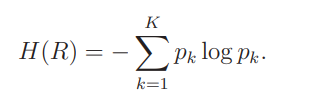

In [72]:
# Calculate the Entropy index for a split dataset
def entropy_index(groups, value_types):
    # count all samples at split point
    n_instances = float(sum([len(group) for group in groups]))
    # sum weighted Entropy for each group
    entropy = 0.0
    for group in groups:
        size = float(len(group))
        # if values in group do not exist -> next iteration
        if size == 0:
            continue
        score = 0.0
        # score the group based on the score for each class
        for val in value_types:
            p = [row[-1] for row in group].count(val) / size
            if p == 0:
                score -= 0
            else:
                score -= p * math.log2(p)
        # Getting weighted Entropy Index depending on size of group
        entropy += score * (size / n_instances)
    return entropy

## Splits for a decision tree based on Entropy Criteria

In [73]:
# Split a dataset based on an attribute value
def make_split(index, value, dataset):
    left, right = list(), list()
    for row in dataset:
        if row[index] < value:
            left.append(row)
        else:
            right.append(row)
    return left, right

In [100]:
# Select the best split point for a dataset
def get_split(dataset):
    value_types = list(set(row[-1] for row in dataset))
    # best_index - best column for splitting
    # best_value - best value of column, which should be used for splitting a dataset into left and right ones
    # best_score - best entropy parameter
    # best_groups - left and right parts of tree
    best_index, best_value, best_score, best_groups = 999999, 999999, 999999, None
    for index in range(len(dataset[0])-1): #for all columns except value-attribute
        for row in dataset:
            # make groups and calculate weighted entropy for them
            groups = make_split(index, row[index], dataset)
            entropy = entropy_index(groups, value_types)
            # if entropy is better update best parameters
            if entropy < best_score:
                best_index, best_value, best_score, best_groups = index, row[index], entropy, groups
    return {'index':best_index, 'value':best_value, 'groups':best_groups}

In [87]:
get_split(training_list)

0.6381008122880476


{'index': 5,
 'value': 3,
 'groups': ([[58, 3, 236596, 11, 9, 2, 1, 0, 4, 1, 0, 0, 45, 26, 1],
   [39, 2, 207853, 2, 8, 2, 13, 0, 4, 1, 0, 0, 50, 26, 0],
   [25, 3, 86872, 9, 13, 2, 4, 0, 4, 1, 0, 0, 55, 26, 1],
   [41, 3, 445382, 12, 14, 2, 4, 0, 4, 1, 0, 1977, 65, 26, 1],
   [42, 3, 124692, 11, 9, 2, 6, 0, 4, 1, 0, 0, 40, 26, 0],
   [47, 3, 287828, 9, 13, 2, 4, 5, 4, 0, 0, 0, 40, 26, 1],
   [58, 6, 109567, 10, 16, 2, 10, 0, 4, 1, 0, 0, 1, 26, 1],
   [49, 4, 191681, 15, 10, 2, 4, 0, 4, 1, 0, 0, 50, 26, 1],
   [27, 3, 181659, 11, 9, 2, 7, 0, 4, 1, 0, 0, 40, 26, 0],
   [25, 3, 32275, 15, 10, 2, 4, 5, 3, 0, 0, 0, 40, 26, 0],
   [50, 3, 193884, 5, 4, 2, 3, 0, 4, 1, 0, 0, 40, 6, 0],
   [32, 3, 132601, 9, 13, 2, 10, 0, 4, 1, 0, 0, 50, 26, 0],
   [45, 2, 164427, 9, 13, 0, 10, 4, 4, 0, 0, 0, 40, 26, 0],
   [41, 1, 130760, 9, 13, 2, 13, 0, 4, 1, 0, 0, 24, 26, 0],
   [41, 3, 343121, 11, 9, 0, 1, 4, 4, 0, 0, 0, 36, 26, 0],
   [41, 3, 130408, 11, 9, 0, 12, 4, 2, 0, 0, 0, 38, 26, 0],
   [38, 1, 12

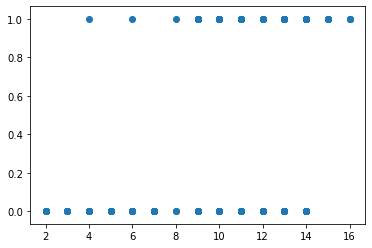

In [85]:
plt.scatter(df_train['Education-num'], df_train['Income-per-year'])

## Creating a Decision tree based on ordinary nodes and terminal nodes (leaves)
### A terminal node should be created in such cases:
### 1) If one of the groups is empty
### 2) If current depth is greater than Max(depth)
### 3) If size of a leaf (count of entries) is less than Min(size)

In [137]:
# Creating a terminal node
def set_terminal(group):
    classes = [row[-1] for row in group]
    # Choose the most possible class (option/result)
    return max(set(classes), key=classes.count)

In [102]:
# Splitting current node on left and right ones
def split_node(node, max_depth, min_size, depth):
    left, right = node['groups']
    del(node['groups'])
    # if one group is empty, make terminal nodes
    if not left or not right:
        node['left'] = node['right'] = set_terminal(left + right)
        return
    # if current depth is greater than max_depth, then make terminal nodes
    if depth >= max_depth:
        node['left'] = set_terminal(left)
        node['right'] = set_terminal(right)
        return
    # processing left child
    # if size of left child less than min_size, then make terminal node
    if len(left) <= min_size:
        node['left'] = set_terminal(left)
    # if size of left child greater than min_size, then make an ordinary node for next split
    else:
        node['left'] = get_split(left)
        split_node(node['left'], max_depth, min_size, depth+1)
    # process right child
    # if size of right child less than min_size, then make terminal node
    if len(right) <= min_size:
        node['right'] = set_terminal(right)
    # if size of right child greater than min_size, then make an ordinary node for next split
    else:
        node['right'] = get_split(right)
        split_node(node['right'], max_depth, min_size, depth+1)

In [108]:
# Build a decision tree
def trainTREE(train, max_depth=5, min_size=20):
    training_list = train.values.tolist()
    root = get_split(training_list)
    split_node(root, max_depth, min_size, 1)
    return root

In [104]:
# Print a created decision tree
def print_tree(node, depth=0):
    # if node is a dict, it has child nodes
    if isinstance(node, dict):
        print('%s[X%d < %.3f]' % ((depth*' ', (node['index']+1), node['value'])))
        print_tree(node['left'], depth+1)
        print_tree(node['right'], depth+1)
    # otherwise, it is a single node - a leaf
    else:
        print('%s[%s]' % ((depth*' ', node)))

In [142]:
tree = trainTREE(df_train, 5, 20)

In [143]:
print_tree(tree)

[X6 < 3.000]
 [X5 < 11.000]
  [X13 < 38.000]
   [X1 < 41.000]
    [0]
    [0]
   [X11 < 7298.000]
    [X1 < 31.000]
     [0]
     [0]
    [1]
  [X6 < 2.000]
   [0]
   [X2 < 6.000]
    [X11 < 7298.000]
     [1]
     [1]
    [1]
 [X5 < 14.000]
  [X1 < 37.000]
   [X1 < 24.000]
    [X1 < 19.000]
     [0]
     [0]
    [X1 < 24.000]
     [0]
     [0]
   [X1 < 39.000]
    [1]
    [X7 < 10.000]
     [0]
     [0]
  [0]


## Making predictions based on created TREE model
### For each row in dataset func 'PredictTREE' predicts the result by going through created tree

In [124]:
# Make a prediction for a dataset
def predictTREE(node, test):
    # Make a list of lists
    testing_list = test.values.tolist()
    result_list = []
    # Predict value for each row
    for row in testing_list:
        result_list.append(predictTREE_Row(node, row))
    return result_list

In [127]:
# Make a prediction for a row
def predictTREE_Row(node, row):
    # go recursively through the tree until function reaches a terminal node - it will be a result
    if row[node['index']] < node['value']:
        if isinstance(node['left'], dict):
            return predictTREE_Row(node['left'], row)
        else:
            return node['left']
    else:
        if isinstance(node['right'], dict):
            return predictTREE_Row(node['right'], row)
        else:
            return node['right']

In [144]:
results = predictTREE(tree, df_test)

## Function for getting the percentage of correct answers to evaluate created model

In [135]:
# get percentage of correct answers
def checkScore(list1, list2):
    correct = 0.0
    for i in range(len(list1)):
        if list1[i] == list2[i]:
            correct+=1
    return correct/len(list1)

In [145]:
checkScore(results, list(df_test['Income-per-year']))

0.85

In [148]:
def getMetrics(y_test, y_predicted):
    total_count = len(y_test)
    test_neg_count, test_pos_count = 0, 0
    for val in y_test:
        if val == 1:
            test_pos_count += 1
        else:
            test_neg_count += 1
    fpr=[]
    tpr=[]
    auc = 0
    fpr.append(0)
    tpr.append(0)
    y_list=[]
    #y_pred = y_predicted.sort(reverse=True)    
    for i in range(total_count):
        if y_predicted[i] == 0:
            y_list.append(y_test[i])
        else:
            y_list.insert(0, y_test[i])
    for i in range(total_count):
        if y_list[i] == 0:
            fpr.append(fpr[i]+1/test_neg_count)
            tpr.append(tpr[i])
            auc = auc + tpr[i+1]/test_neg_count
        else:
            fpr.append(fpr[i])
            tpr.append(tpr[i]+1/test_pos_count)
    return tpr, fpr, auc

In [149]:
tpr, fpr, auc = getMetrics(list(df_test['Income-per-year']), results)

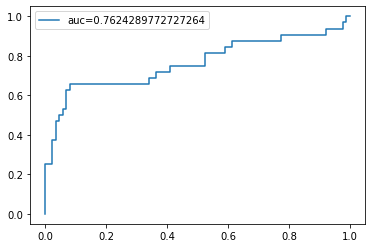

In [161]:
plt.plot(fpr, tpr, label='auc='+str(auc))
plt.legend()
plt.show()